In [1]:
# data: http://www.amber.utah.edu/AMBER-workshop/London-2015/DNA-tutorial/
import pytraj as pt

traj0 = pt.load('md.nc', 'dna.prmtop')
traj0

pytraj.Trajectory, 831 frames: 
Size: 0.298563 (GB)
<Topology: 16074 atoms, 5144 residues, 5122 mols, PBC with box type = truncoct>
           

In [2]:
traj = traj0.autoimage()['!:WAT']
traj

pytraj.Trajectory, 831 frames: 
Size: 0.014488 (GB)
<Topology: 780 atoms, 46 residues, 24 mols, PBC with box type = truncoct>
           

In [3]:
# compute rmsd and convert raw data to pandas' DataFrame
data = pt.rmsd(traj, ref=0, mask=':1-14&!@H=', dtype='dataframe')
data.head(5)

,RMSD_00001
0,4.959681e-07
1,6.372364e-01
2,6.766345e-01
3,7.819916e-01
4,9.697053e-01


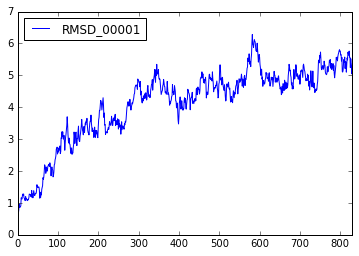

In [4]:
%matplotlib inline
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aaad904acf8>]], dtype=object)

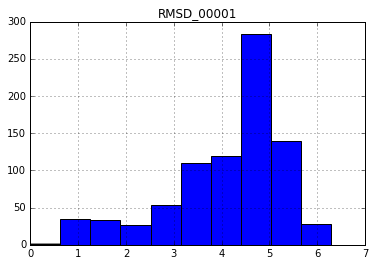

In [5]:
data.hist()

# Parallel

In [6]:
traj = pt.iterload('md.nc', 'dna.prmtop')
data = pt.pmap(pt.rmsd, traj, ref=0, mask=':1-14&!@H=', n_cores=8)

# serial: data = pt.rmsd(traj, ref=0, mask=':1-14&!@H=')

## Parallel scaling

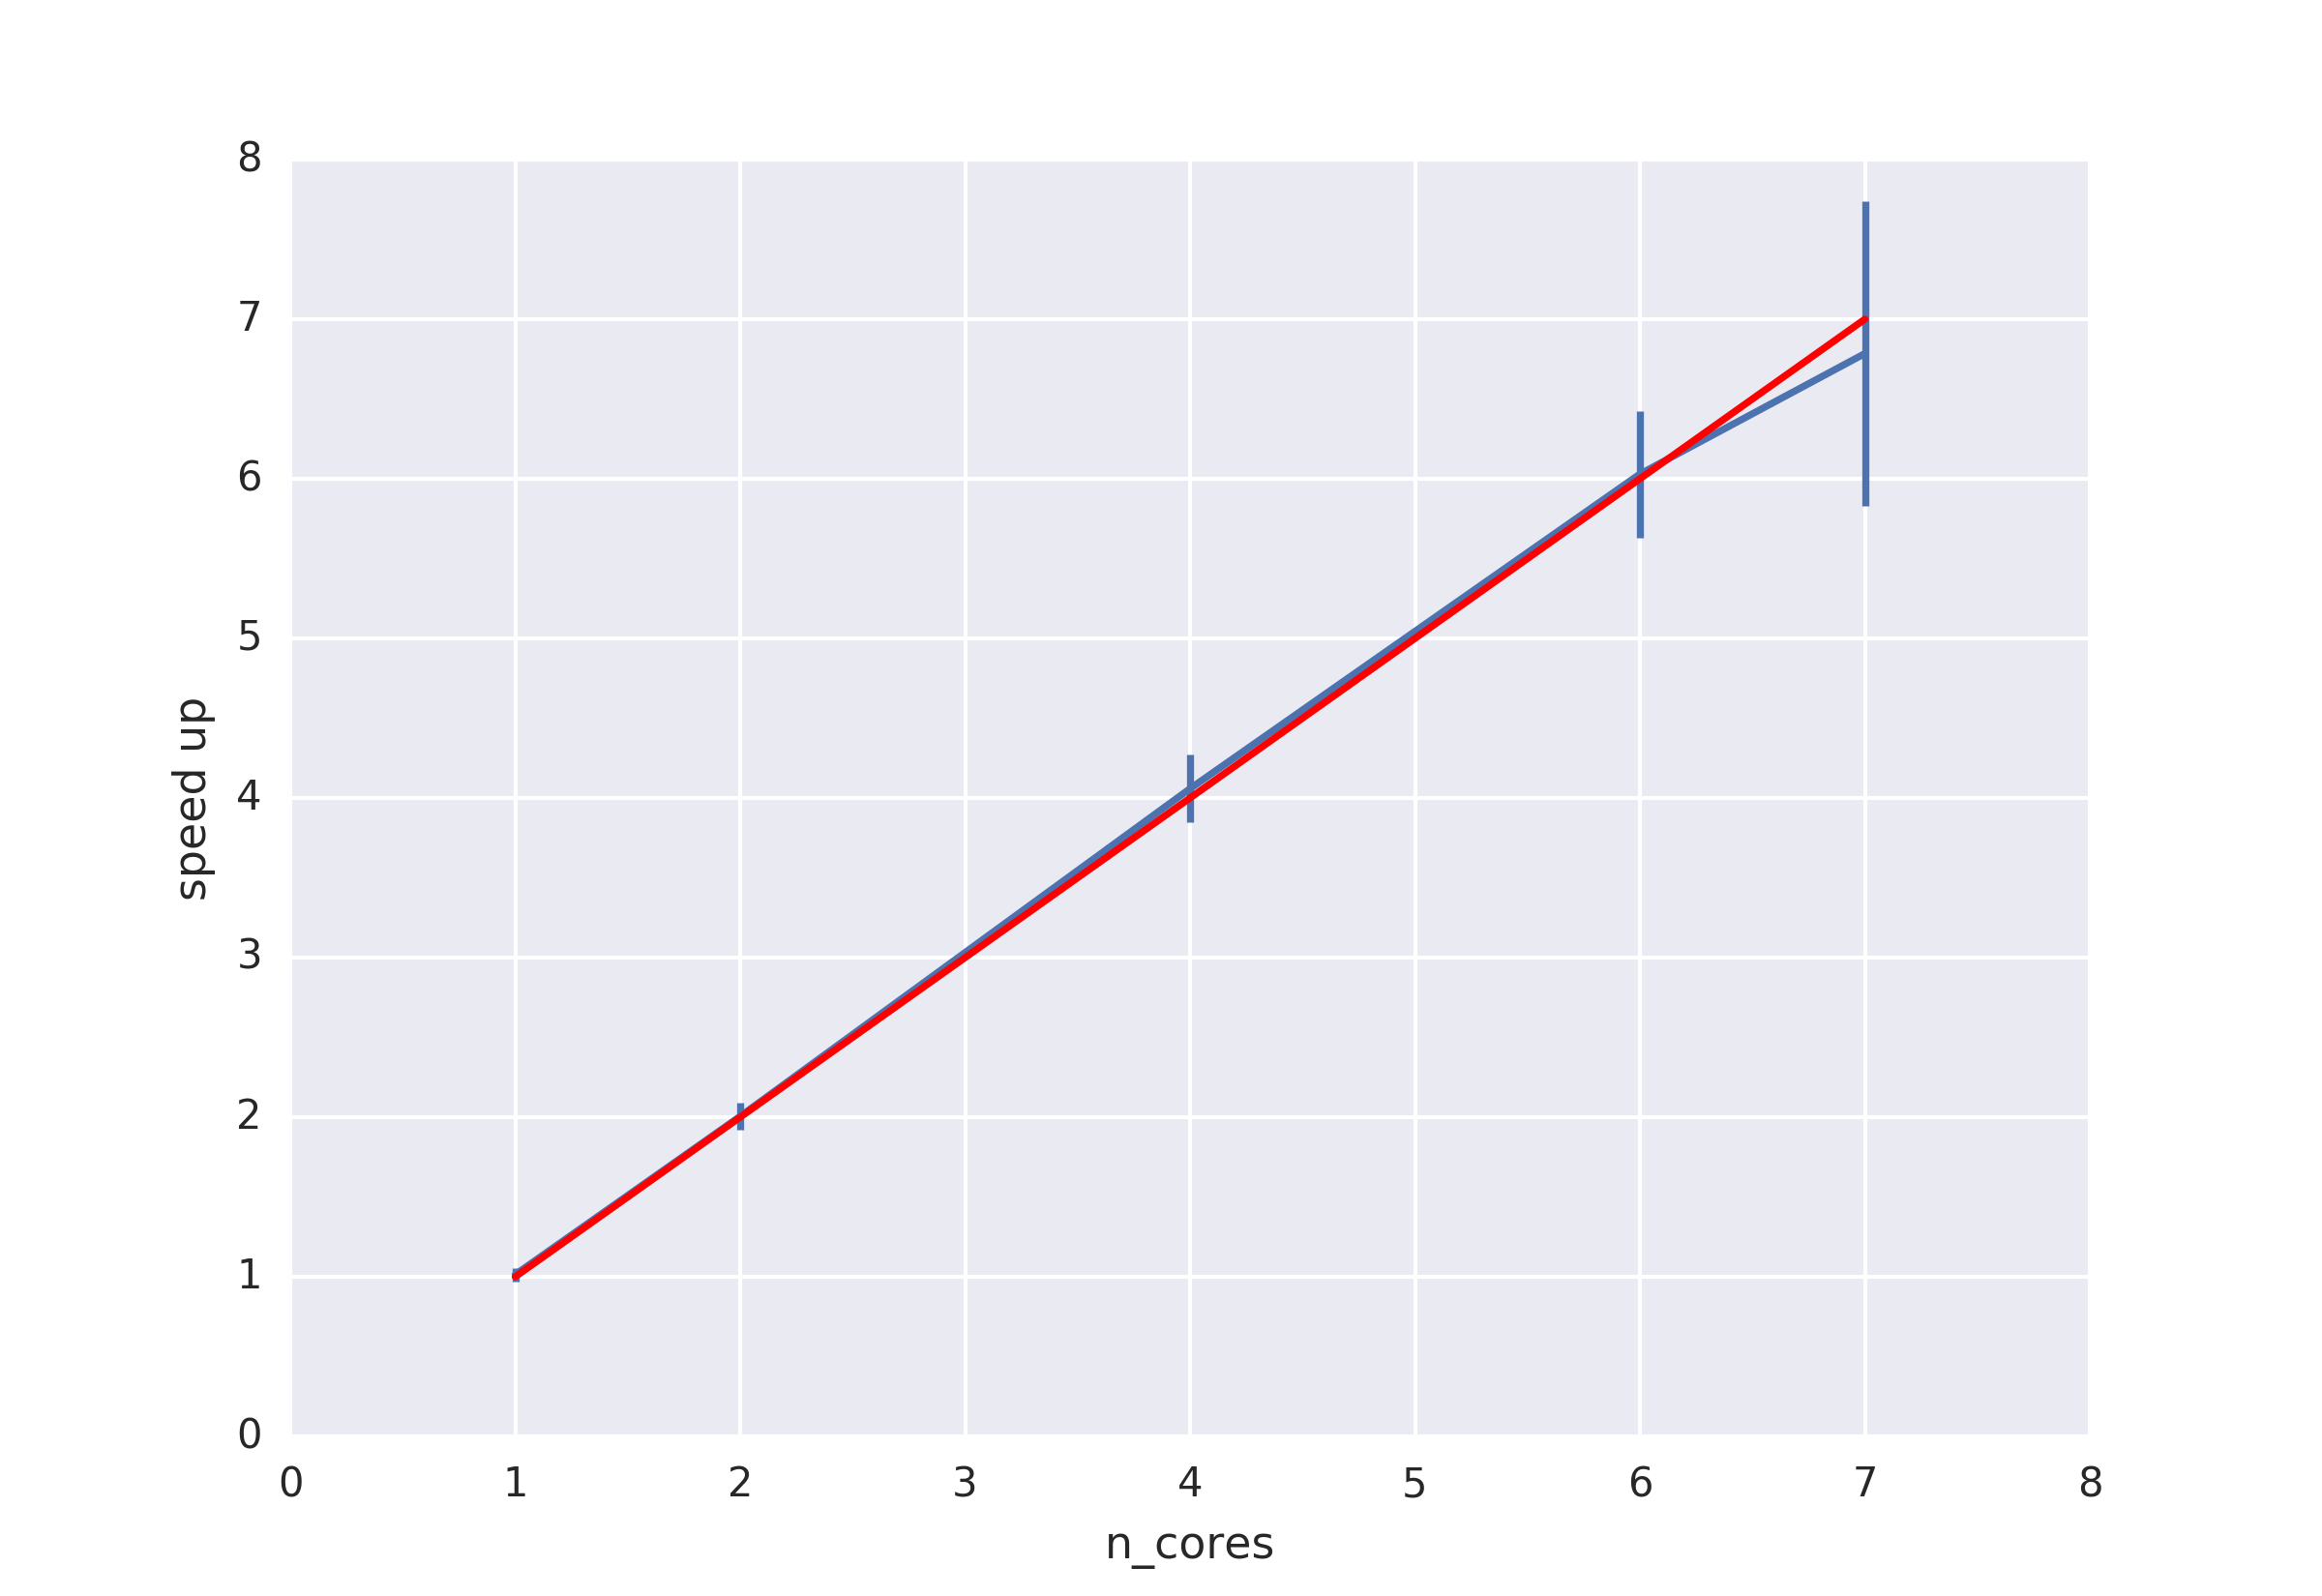

In [7]:
from IPython import display
display.Image('bench_pmap_casegroup.png', width=500)

# Intergrate will pysander (Python interface for sander)

In [8]:
traj2 = pt.iterload('tz2.nc', 'tz2.parm7')
energies = pt.energy_decomposition(traj2, igb=8, dtype='dataframe')
energies[['bond', 'angle', 'dihedral', 'gb']].head()

,bond,angle,dihedral,gb
0,0.015314,128.545148,111.611329,-412.532664
1,0.013582,105.064945,105.392413,-400.090422
2,0.012521,103.520284,93.030850,-439.927013
3,0.016334,94.560780,105.522288,-400.956276
4,0.013338,99.508124,105.850222,-404.061030


# Support more file formats?

In [9]:
# XTC
import mdtraj as md

t0 = md.load('./monolayer.xtc', top='monolayer.pdb')

coordinates = t0.xyz.astype('f8')
traj = pt.Trajectory(xyz=coordinates, top='monolayer.pdb')
pt.center_of_mass(traj)

pytraj.Trajectory, 101 frames: 
Size: 0.008127 (GB)
<Topology: 3600 atoms, 1 residues, 0 mols, non-PBC>
           



array([[ 2.93015586,  2.60094379,  1.66991936],
       [ 3.01727943,  2.57976876,  1.59680848],
       [ 3.02472708,  2.57837296,  1.58989385],
       ..., 
       [ 3.0366626 ,  2.57732852,  1.5900617 ],
       [ 3.08111659,  2.58228309,  1.59082286],
       [ 3.08029504,  2.58351248,  1.58572677]])